# CIFAR-10 Classification (PyTorch)

Fully Connected Network with Adam & SGD

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = train_dataset.classes


100.0%


In [4]:

class CIFARNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,10)

    def forward(self,x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)


In [5]:

def train_model(model, optimizer, criterion, epochs=10):
    losses = []
    for epoch in range(epochs):
        running_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        losses.append(running_loss/len(train_loader))
        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}")
    return losses


In [6]:

criterion = nn.CrossEntropyLoss()

model_adam = CIFARNet()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)
loss_adam = train_model(model_adam, optimizer_adam, criterion)

model_sgd = CIFARNet()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
loss_sgd = train_model(model_sgd, optimizer_sgd, criterion)


Epoch 1: Loss=1.6511
Epoch 2: Loss=1.4306
Epoch 3: Loss=1.3223
Epoch 4: Loss=1.2256
Epoch 5: Loss=1.1449
Epoch 6: Loss=1.0701
Epoch 7: Loss=0.9985
Epoch 8: Loss=0.9296
Epoch 9: Loss=0.8618
Epoch 10: Loss=0.7985
Epoch 1: Loss=1.7708
Epoch 2: Loss=1.4676
Epoch 3: Loss=1.3368
Epoch 4: Loss=1.2445
Epoch 5: Loss=1.1663
Epoch 6: Loss=1.0893
Epoch 7: Loss=1.0254
Epoch 8: Loss=0.9582
Epoch 9: Loss=0.8988
Epoch 10: Loss=0.8399


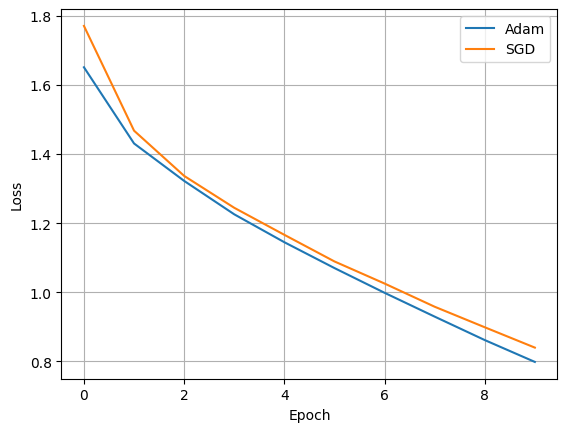

In [7]:

plt.plot(loss_adam, label='Adam')
plt.plot(loss_sgd, label='SGD')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [8]:

def evaluate(model):
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
    return 100*correct/total

print("Accuracy Adam:", evaluate(model_adam))
print("Accuracy SGD:", evaluate(model_sgd))


Accuracy Adam: 54.97
Accuracy SGD: 54.59
